In [1]:
import math
from typing import List, Dict
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
def bucketize(point: float, bucket_size: float) -> float:
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)


def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)


def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

In [3]:
import random
from scratch.probability import inverse_normal_cdf

random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

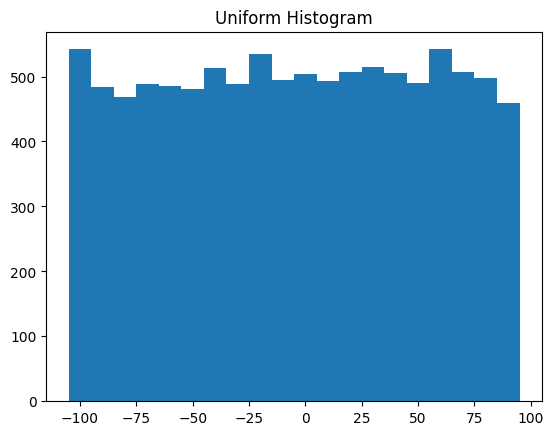

In [4]:
plot_histogram(uniform, 10, "Uniform Histogram")

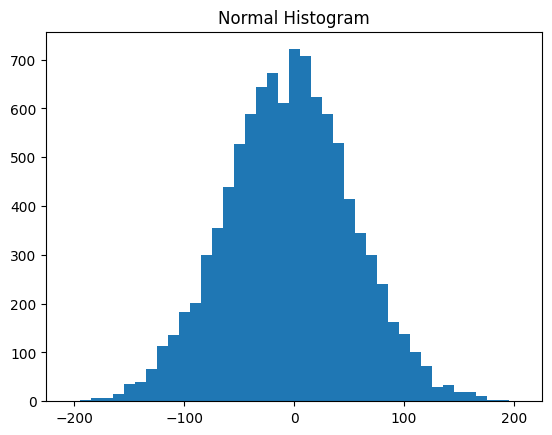

In [5]:
plot_histogram(normal, 10, "Normal Histogram")

In [6]:
def random_normal() -> float:
    """returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

In [7]:
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

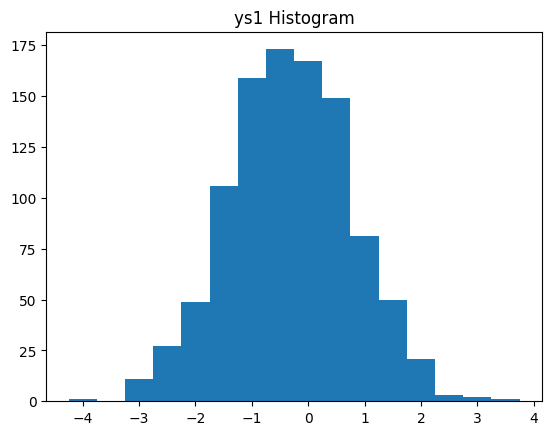

In [8]:
plot_histogram(ys1, 0.5, "ys1 Histogram")

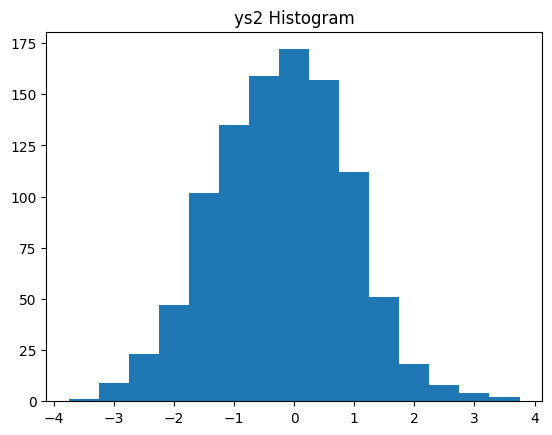

In [9]:
plot_histogram(ys2, 0.5, "ys2 Histogram")

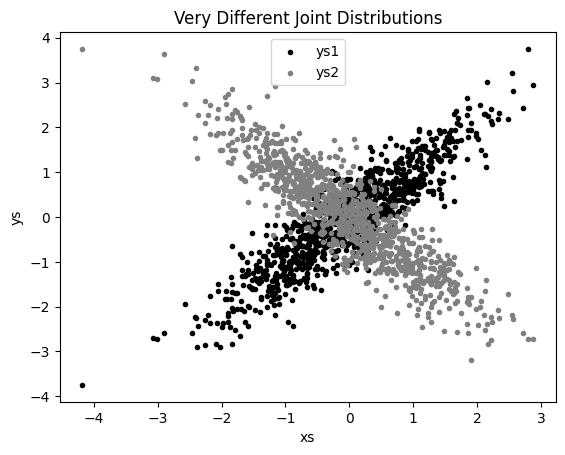

In [10]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [11]:
from scratch.statistic import correlation

print(correlation(xs, ys1))  # about 0.9
print(correlation(xs, ys2))  # about -0.9

0.9010493686379649
-0.8920981526879999


In [12]:
from scratch.linear_algebra import Matrix, Vector, make_matrix


def correlation_matrix(data: List[Vector]) -> Matrix:
    """returns the len(data) x len(data) matrix whose (i, j)-th entry
    is the correlation between data[i] and data[j]"""
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])

    return make_matrix(len(data), len(data), correlation_ij)

In [13]:
corr_data = [[i * j + random.gauss(0, 1)
              for j in range(100)] for i in range(4)]

In [14]:
correlation_matrix(corr_data)

[[1.0000000000000002,
  -0.008873526077836478,
  -6.000903410548096e-05,
  -0.0006050941845025094],
 [-0.008873526077836478,
  0.9999999999999999,
  0.9992832562433511,
  0.999253021085746],
 [-6.000903410548096e-05,
  0.9992832562433511,
  1.0000000000000002,
  0.9998261200035503],
 [-0.0006050941845025095,
  0.9992530210857459,
  0.9998261200035502,
  0.9999999999999999]]

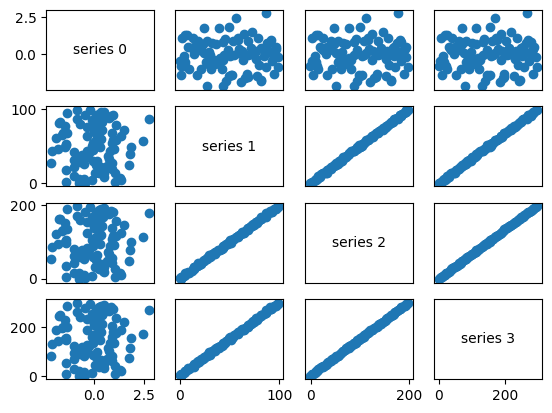

In [15]:
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):

        # scatter column_j on the x-axis vs. column_i on the y-axis
        if i != j:
            ax[i][j].scatter(corr_data[j], corr_data[i])

        # unless i == j, in which case show the series name
        else:
            ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                              xycoords='axes fraction',
                              ha="center", va="center")

        # then hide axis labels except left and bottom charts
        if i < num_vectors - 1:
            ax[i][j].xaxis.set_visible(False)
        if j > 0:
            ax[i][j].yaxis.set_visible(False)

# fix the bottom-right and top-left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()

In [ ]:
import datetime

stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'AAPL'}

# opps, typo
stock_price['cosing_price'] = 103.06

In [17]:
prices: Dict[datetime.date, float] = {}

In [18]:
from collections import namedtuple

StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03

In [ ]:
from typing import NamedTuple


class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """it's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']


price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

In [36]:
from dataclasses import dataclass


@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']


price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price2.symbol == 'MSFT'
assert price2.closing_price == 106.03
assert price2.is_high_tech()

In [37]:
# stock split
price2.closing_price /= 2
print(price2.closing_price)

53.015


# Cleanning and munging

In [38]:
from dateutil import parser

def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol=symbol,
                      date=parser.parse(date).date(),
                      closing_price=float(closing_price))
# Now we can call parse_row like this:
stock = parse_row(["MSFT", "2018-12-14", "106.03"])

assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018, 12, 14)
assert stock.closing_price == 106.03

In [39]:
import re
from typing import Optional

In [40]:
def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row

    # Stock symbol should be all capital letters
    if not re.match(r"^[A-Z]+$", symbol):
        return None

    try:
        date = parser.parse(date_).date()
    except ValueError:
        return None

    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)

In [41]:
# Shgould return None

assert try_parse_row(["MSFT", "2018-12-14", "102.06"]) is not None
assert try_parse_row(["MSFT", "2018-12--14", "102.06"]) is None
assert try_parse_row(["MSFT", "2018-12-14", "102.06a"]) is None 

# but should return the same as parse_row
assert try_parse_row(["MSFT", "2018-12-14", "102.06"]) == StockPrice("MSFT", datetime.date(2018, 12, 14), 102.06)